## Coupled NetLogo/SEAWAT model setup using the EMA Workbench

The code below presents the setup for an analysis of a coupled NetLogo/SEAWAT model adapted for use with the EMA Workbench, using the simple "toy" case described in the paper. The `run_experiment` method of the NetLogoSEAWAT module can also be adapted for standalone use without the Workbench.

The SEAWAT software and documentation can be obtained at https://water.usgs.gov/ogw/seawat/ .
The swt_v4 executable should be placed under the working directory defined below (in this example, the coupled_model subfolder).

More information about the use of the EMA Workbench is provided at https://emaworkbench.readthedocs.io .

In [4]:
from NetLogoSEAWAT import ToyModel, ToyModelRep
  
from ema_workbench import (Model, RealParameter, Policy,
                           TimeSeriesOutcome, perform_experiments, ema_logging, MultiprocessingEvaluator)

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.util import ema_logging, load_results, save_results
from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.pairs_plotting import pairs_scatter
from ema_workbench.analysis.plotting_util import KDE

C:\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
#Set model parameters using an instance of the ToyModel class
class CoupledModel(ToyModel):

    netlogo_filename = 'ToyModel.nlogo' #Path to NetLogo model file
    swtexe_name = 'swt_v4.exe' #Path to SEAWAT executable file relative to the 
    GUI = False #Display NetLogo GUI during runs 
    
    run_length = 120 #Total number of simulated coupled periods
    perlen = 30 #Length of each coupled simulation period (days)
    nper = 1 #Number of MODFLOW stress periods per coupled simulation period
    nstp = 1 #Number of MODFLOW time steps per stress period
    steady = True #Switch for steady-state/transient MODFLOW simulation

    #Layer parameters can be replaced by array structures for more detailed models - see FloPy documentation
    laytyp = 0
    ztop = -10.
    Laquifer = 20. #Aquifer thickness
    dz = 20. #Layer thickness discretization
    zbot = ztop - Laquifer
     
    #Default grid parameters - see agent_functions for details
    dmin = 10
    dmax = 10
    nstep = 2
    grid_extents = [-200, 1200, -200, 1200] 
    
    #Default conductivities and porosity - can be handled as arrays for more detailed models
    HK = 40.
    VK = 10.
    PEFF = 0.3
    
    #Groundwater flow (m/year)
    gwflow_x = 0.
    gwflow_y = 0.
     
    #Other constants - used to calculate geohydrological parameters at runtime
    al = 1.
    trp_mult = 0.1
    kT_s = 3.
    kT_f = 0.61
    rho_solid = 2700.
    rho_f = 1000.
    Cp_f = 4183.
     
    #Lists of possible uncertain parameters for each component (not all parameters need to be sampled below)
    NetLogo_uncertainties = ['alpha','MinRadius','eta_a','eta_d']
    SEAWAT_uncertainties = ['HK','PEFF']
     
     

#Turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)
    
#Instantiate the model
working_dir = r'./coupled_model'
name = 'ToyModel'
model = CoupledModel(name, wd=working_dir, model_file='ToyModel.nlogo')

# Uncertainty ranges to be sampled (each parameter should be assigned to one of the NetLogo_uncertainties
# or SEAWAT_uncertainties lists above)
# Uncertainties override the default values given above
model.uncertainties = [RealParameter('alpha', 2, 10),
                       RealParameter('HK', 10, 60)]
 
#NetLogo outcomes to be recorded
model.outcomes = [TimeSeriesOutcome('wells'),
                  TimeSeriesOutcome('SubsurfaceUse'),
                  TimeSeriesOutcome('MeanEff')]

# Policies can be used to directly set NetLogo or SEAWAT parameters. These parameters
# override the values that may have been set by uncertainties defined above.
# When running the model with an ensemble, the set of experiments is repeated
# for each policy
policies = [Policy('Radius 40', MinRadius=40),
            Policy('Radius 20', MinRadius=20)]  

## Run a single experiment without an ensemble
# model.model_init(policy=policies[1])
# model.run_experiment(experiment=policies[1])
# results = model._handle_outcomes()


#Perform and record 8 experiments for each policy
#The EMA Workbench's multiprocessing evaluators can be used for better performance
n_experiments = 8
results = perform_experiments(model, scenarios=n_experiments, policies=policies)
save_results(results, r'ToyModel16.tar.gz')


[MainProcess/INFO] performing 8 scenarios * 2 policies * 1 model(s) = 16 experiments
[MainProcess/INFO] performing experiments sequentially
INFO:root:NetLogo started
INFO:root:Model opened
INFO:root:Policy parameters set successfully
INFO:root:NetLogo parameters set successfully
INFO:root:SEAWAT parameters set successfully
INFO:root: -- Simulating period 0 of 120
INFO:root: -- Simulating period 1 of 120
INFO:root: -- Simulating period 2 of 120
INFO:root: -- Simulating period 3 of 120
INFO:root: -- Simulating period 4 of 120
INFO:root: -- Simulating period 5 of 120
INFO:root: -- Simulating period 6 of 120
INFO:root: -- Simulating period 7 of 120
INFO:root: -- Simulating period 8 of 120
INFO:root: -- Simulating period 9 of 120
INFO:root: -- Simulating period 10 of 120
INFO:root: -- Simulating period 11 of 120
INFO:root: -- Simulating period 12 of 120
INFO:root: -- Simulating period 13 of 120
INFO:root: -- Simulating period 14 of 120
INFO:root: -- Simulating period 15 of 120
INFO:root: --

INFO:root: -- Simulating period 65 of 120
INFO:root: -- Simulating period 66 of 120
INFO:root: -- Simulating period 67 of 120
INFO:root: -- Simulating period 68 of 120
INFO:root: -- Simulating period 69 of 120
INFO:root: -- Simulating period 70 of 120
INFO:root: -- Simulating period 71 of 120
INFO:root: -- Simulating period 72 of 120
INFO:root: -- Simulating period 73 of 120
INFO:root: -- Simulating period 74 of 120
INFO:root: -- Simulating period 75 of 120
INFO:root: -- Simulating period 76 of 120
INFO:root: -- Simulating period 77 of 120
INFO:root: -- Simulating period 78 of 120
INFO:root: -- Simulating period 79 of 120
INFO:root: -- Simulating period 80 of 120
INFO:root: -- Simulating period 81 of 120
INFO:root: -- Simulating period 82 of 120
INFO:root: -- Simulating period 83 of 120
INFO:root: -- Simulating period 84 of 120
INFO:root: -- Simulating period 85 of 120
INFO:root: -- Simulating period 86 of 120
INFO:root: -- Simulating period 87 of 120
INFO:root: -- Simulating period 88

INFO:root: -- Simulating period 13 of 120
INFO:root: -- Simulating period 14 of 120
INFO:root: -- Simulating period 15 of 120
INFO:root: -- Simulating period 16 of 120
INFO:root: -- Simulating period 17 of 120
INFO:root: -- Simulating period 18 of 120
INFO:root: -- Simulating period 19 of 120
INFO:root: -- Simulating period 20 of 120
INFO:root: -- Simulating period 21 of 120
INFO:root: -- Simulating period 22 of 120
INFO:root: -- Simulating period 23 of 120
INFO:root: -- Simulating period 24 of 120
INFO:root: -- Simulating period 25 of 120
INFO:root: -- Simulating period 26 of 120
INFO:root: -- Simulating period 27 of 120
INFO:root: -- Simulating period 28 of 120
INFO:root: -- Simulating period 29 of 120
INFO:root: -- Simulating period 30 of 120
INFO:root: -- Simulating period 31 of 120
INFO:root: -- Simulating period 32 of 120
INFO:root: -- Simulating period 33 of 120
INFO:root: -- Simulating period 34 of 120
INFO:root: -- Simulating period 35 of 120
INFO:root: -- Simulating period 36

INFO:root: -- Simulating period 84 of 120
INFO:root: -- Simulating period 85 of 120
INFO:root: -- Simulating period 86 of 120
INFO:root: -- Simulating period 87 of 120
INFO:root: -- Simulating period 88 of 120
INFO:root: -- Simulating period 89 of 120
INFO:root: -- Simulating period 90 of 120
INFO:root: -- Simulating period 91 of 120
INFO:root: -- Simulating period 92 of 120
INFO:root: -- Simulating period 93 of 120
INFO:root: -- Simulating period 94 of 120
INFO:root: -- Simulating period 95 of 120
INFO:root: -- Simulating period 96 of 120
INFO:root: -- Simulating period 97 of 120
INFO:root: -- Simulating period 98 of 120
INFO:root: -- Simulating period 99 of 120
INFO:root: -- Simulating period 100 of 120
INFO:root: -- Simulating period 101 of 120
INFO:root: -- Simulating period 102 of 120
INFO:root: -- Simulating period 103 of 120
INFO:root: -- Simulating period 104 of 120
INFO:root: -- Simulating period 105 of 120
INFO:root: -- Simulating period 106 of 120
INFO:root: -- Simulating pe

INFO:root: -- Simulating period 32 of 120
INFO:root: -- Simulating period 33 of 120
INFO:root: -- Simulating period 34 of 120
INFO:root: -- Simulating period 35 of 120
INFO:root: -- Simulating period 36 of 120
INFO:root: -- Simulating period 37 of 120
INFO:root: -- Simulating period 38 of 120
INFO:root: -- Simulating period 39 of 120
INFO:root: -- Simulating period 40 of 120
INFO:root: -- Simulating period 41 of 120
INFO:root: -- Simulating period 42 of 120
INFO:root: -- Simulating period 43 of 120
INFO:root: -- Simulating period 44 of 120
INFO:root: -- Simulating period 45 of 120
INFO:root: -- Simulating period 46 of 120
INFO:root: -- Simulating period 47 of 120
INFO:root: -- Simulating period 48 of 120
INFO:root: -- Simulating period 49 of 120
INFO:root: -- Simulating period 50 of 120
INFO:root: -- Simulating period 51 of 120
INFO:root: -- Simulating period 52 of 120
INFO:root: -- Simulating period 53 of 120
INFO:root: -- Simulating period 54 of 120
INFO:root: -- Simulating period 55

INFO:root: -- Simulating period 104 of 120
INFO:root: -- Simulating period 105 of 120
INFO:root: -- Simulating period 106 of 120
INFO:root: -- Simulating period 107 of 120
INFO:root: -- Simulating period 108 of 120
INFO:root: -- Simulating period 109 of 120
INFO:root: -- Simulating period 110 of 120
INFO:root: -- Simulating period 111 of 120
INFO:root: -- Simulating period 112 of 120
INFO:root: -- Simulating period 113 of 120
INFO:root: -- Simulating period 114 of 120
INFO:root: -- Simulating period 115 of 120
INFO:root: -- Simulating period 116 of 120
INFO:root: -- Simulating period 117 of 120
INFO:root: -- Simulating period 118 of 120
INFO:root: -- Simulating period 119 of 120
[MainProcess/INFO] 8 cases completed
INFO:root:Model opened
INFO:root:Policy parameters set successfully
INFO:root:NetLogo parameters set successfully
INFO:root:SEAWAT parameters set successfully
INFO:root: -- Simulating period 0 of 120
INFO:root: -- Simulating period 1 of 120
INFO:root: -- Simulating period 2 

INFO:root: -- Simulating period 51 of 120
INFO:root: -- Simulating period 52 of 120
INFO:root: -- Simulating period 53 of 120
INFO:root: -- Simulating period 54 of 120
INFO:root: -- Simulating period 55 of 120
INFO:root: -- Simulating period 56 of 120
INFO:root: -- Simulating period 57 of 120
INFO:root: -- Simulating period 58 of 120
INFO:root: -- Simulating period 59 of 120
INFO:root: -- Simulating period 60 of 120
INFO:root: -- Simulating period 61 of 120
INFO:root: -- Simulating period 62 of 120
INFO:root: -- Simulating period 63 of 120
INFO:root: -- Simulating period 64 of 120
INFO:root: -- Simulating period 65 of 120
INFO:root: -- Simulating period 66 of 120
INFO:root: -- Simulating period 67 of 120
INFO:root: -- Simulating period 68 of 120
INFO:root: -- Simulating period 69 of 120
INFO:root: -- Simulating period 70 of 120
INFO:root: -- Simulating period 71 of 120
INFO:root: -- Simulating period 72 of 120
INFO:root: -- Simulating period 73 of 120
INFO:root: -- Simulating period 74

INFO:root:SEAWAT parameters set successfully
INFO:root: -- Simulating period 0 of 120
INFO:root: -- Simulating period 1 of 120
INFO:root: -- Simulating period 2 of 120
INFO:root: -- Simulating period 3 of 120
INFO:root: -- Simulating period 4 of 120
INFO:root: -- Simulating period 5 of 120
INFO:root: -- Simulating period 6 of 120
INFO:root: -- Simulating period 7 of 120
INFO:root: -- Simulating period 8 of 120
INFO:root: -- Simulating period 9 of 120
INFO:root: -- Simulating period 10 of 120
INFO:root: -- Simulating period 11 of 120
INFO:root: -- Simulating period 12 of 120
INFO:root: -- Simulating period 13 of 120
INFO:root: -- Simulating period 14 of 120
INFO:root: -- Simulating period 15 of 120
INFO:root: -- Simulating period 16 of 120
INFO:root: -- Simulating period 17 of 120
INFO:root: -- Simulating period 18 of 120
INFO:root: -- Simulating period 19 of 120
INFO:root: -- Simulating period 20 of 120
INFO:root: -- Simulating period 21 of 120
INFO:root: -- Simulating period 22 of 120

INFO:root: -- Simulating period 70 of 120
INFO:root: -- Simulating period 71 of 120
INFO:root: -- Simulating period 72 of 120
INFO:root: -- Simulating period 73 of 120
INFO:root: -- Simulating period 74 of 120
INFO:root: -- Simulating period 75 of 120
INFO:root: -- Simulating period 76 of 120
INFO:root: -- Simulating period 77 of 120
INFO:root: -- Simulating period 78 of 120
INFO:root: -- Simulating period 79 of 120
INFO:root: -- Simulating period 80 of 120
INFO:root: -- Simulating period 81 of 120
INFO:root: -- Simulating period 82 of 120
INFO:root: -- Simulating period 83 of 120
INFO:root: -- Simulating period 84 of 120
INFO:root: -- Simulating period 85 of 120
INFO:root: -- Simulating period 86 of 120
INFO:root: -- Simulating period 87 of 120
INFO:root: -- Simulating period 88 of 120
INFO:root: -- Simulating period 89 of 120
INFO:root: -- Simulating period 90 of 120
INFO:root: -- Simulating period 91 of 120
INFO:root: -- Simulating period 92 of 120
INFO:root: -- Simulating period 93

INFO:root: -- Simulating period 18 of 120
INFO:root: -- Simulating period 19 of 120
INFO:root: -- Simulating period 20 of 120
INFO:root: -- Simulating period 21 of 120
INFO:root: -- Simulating period 22 of 120
INFO:root: -- Simulating period 23 of 120
INFO:root: -- Simulating period 24 of 120
INFO:root: -- Simulating period 25 of 120
INFO:root: -- Simulating period 26 of 120
INFO:root: -- Simulating period 27 of 120
INFO:root: -- Simulating period 28 of 120
INFO:root: -- Simulating period 29 of 120
INFO:root: -- Simulating period 30 of 120
INFO:root: -- Simulating period 31 of 120
INFO:root: -- Simulating period 32 of 120
INFO:root: -- Simulating period 33 of 120
INFO:root: -- Simulating period 34 of 120
INFO:root: -- Simulating period 35 of 120
INFO:root: -- Simulating period 36 of 120
INFO:root: -- Simulating period 37 of 120
INFO:root: -- Simulating period 38 of 120
INFO:root: -- Simulating period 39 of 120
INFO:root: -- Simulating period 40 of 120
INFO:root: -- Simulating period 41

INFO:root: -- Simulating period 90 of 120
INFO:root: -- Simulating period 91 of 120
INFO:root: -- Simulating period 92 of 120
INFO:root: -- Simulating period 93 of 120
INFO:root: -- Simulating period 94 of 120
INFO:root: -- Simulating period 95 of 120
INFO:root: -- Simulating period 96 of 120
INFO:root: -- Simulating period 97 of 120
INFO:root: -- Simulating period 98 of 120
INFO:root: -- Simulating period 99 of 120
INFO:root: -- Simulating period 100 of 120
INFO:root: -- Simulating period 101 of 120
INFO:root: -- Simulating period 102 of 120
INFO:root: -- Simulating period 103 of 120
INFO:root: -- Simulating period 104 of 120
INFO:root: -- Simulating period 105 of 120
INFO:root: -- Simulating period 106 of 120
INFO:root: -- Simulating period 107 of 120
INFO:root: -- Simulating period 108 of 120
INFO:root: -- Simulating period 109 of 120
INFO:root: -- Simulating period 110 of 120
INFO:root: -- Simulating period 111 of 120
INFO:root: -- Simulating period 112 of 120
INFO:root: -- Simulat

The EMA Workbench includes several plotting and analysis functions which can be used on the "results" structure. This structure is a tuple which contains two elements: a structured array corresponding to the sampled experiments, and a dictionary with the names of the outcomes as keys and an numpy array as value. The outcomes are recorded in the same order as the sampled experiments.

The figures below present basic examples of time series plots using the outcomes recorded from NetLogo, and paired scatter plots.

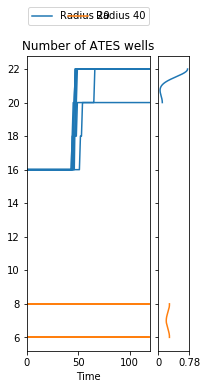

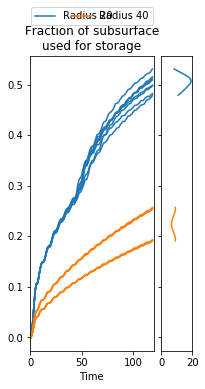

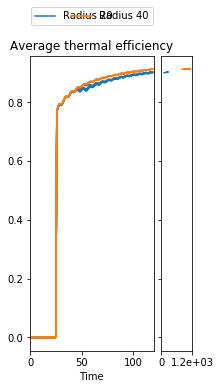

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib

oois = ['wells','SubsurfaceUse', 'MeanEff']
plottitles = {'wells':'Number of ATES wells',
              'SubsurfaceUse':'Fraction of subsurface\nused for storage',
              'MeanEff':'Average thermal efficiency'}
plotlabels = {'wells':'',
              'SubsurfaceUse':'',
              'MeanEff':''}

results = load_results(r'ToyModel16.tar.gz')

# color = plt.cm.YlGnBu(np.linspace(0.4,1.0,n_experiments)) # This returns RGBA; convert:
# hexcolor = map(lambda rgb:'#%02x%02x%02x' % (int(rgb[0]*255),int(rgb[1]*255),int(rgb[2]*255)),
#                tuple(color[:,0:-1]))

# matplotlib.rcParams['axes.prop_cycle'] = cycler('color',hexcolor)

for i in range(len(oois)):
    ax = lines(results, density=KDE,outcomes_to_show=oois[i], group_by='policy',show_envelope=False,
         ylabels=plotlabels, titles=plottitles)
    ax[1][oois[i]].set_xlim([0,120])

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(3, 5, forward=True)
    plt.subplots_adjust(bottom=0.1, right=0.95, left=0.2, top=0.92, wspace=0.15)

plt.show()

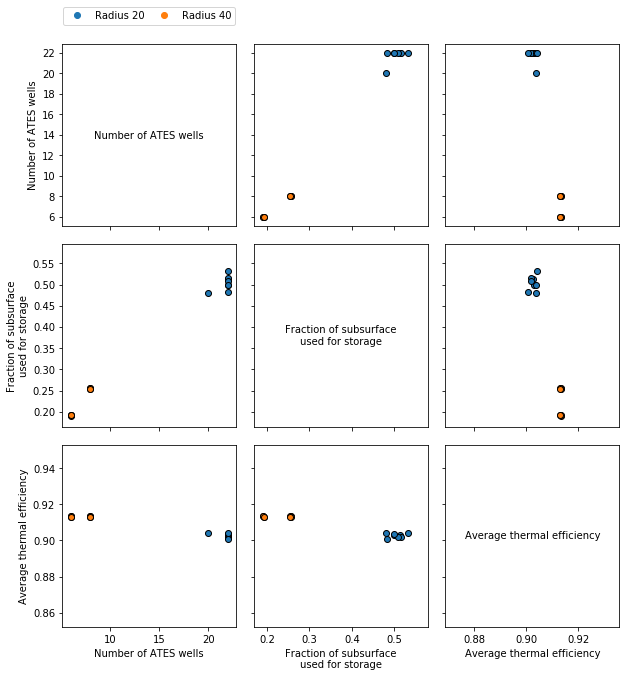

In [12]:
fig, axes = pairs_scatter(results, outcomes_to_show=oois, group_by='policy',ylabels=plottitles, titles=plotlabels)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9, 9, forward=True)
plt.subplots_adjust(bottom=0.08, right=0.95, left=0.09, top=0.98, wspace=0.35)
plt.show()